In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd

In [22]:
iris = load_iris()
iris_data = iris.data

iris_label = iris.target

print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_label,
                                                    test_size=0.2,random_state=11)

dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train,y_train)

pred = dt_clf.predict(X_test)

In [24]:
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris.target_names,
                feature_names =iris.feature_names,impurity=True,filled=True)

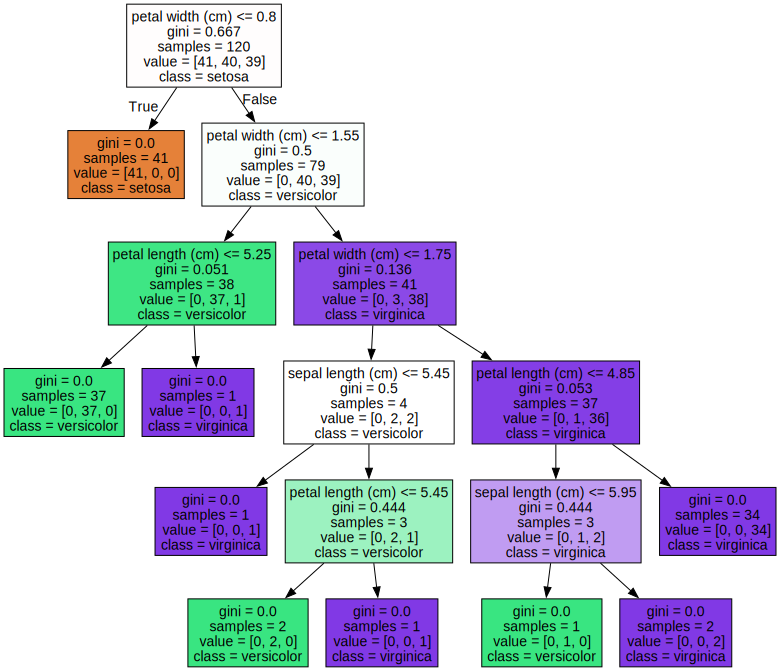

In [36]:
from graphviz import Source
import graphviz
# 'tree.dot' 파일을 읽어서 Source 객체 생성
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

* max_depth

In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_label,
                                                    test_size=0.2,random_state=11)

dt_clf = DecisionTreeClassifier(max_depth=3,random_state=11)
dt_clf.fit(X_train,y_train)

pred = dt_clf.predict(X_test)

In [40]:
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris.target_names,
                feature_names =iris.feature_names,impurity=True,filled=True)

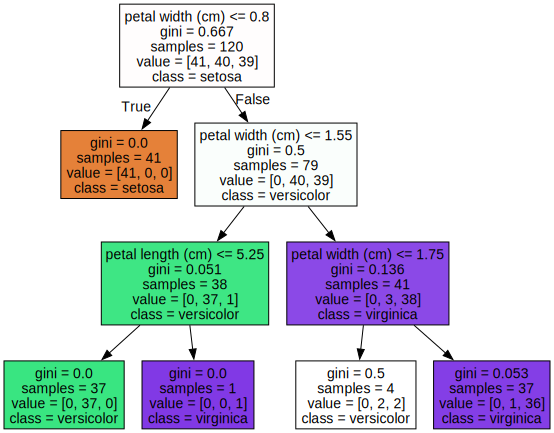

In [41]:
from graphviz import Source
import graphviz
# 'tree.dot' 파일을 읽어서 Source 객체 생성
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

* min_samples_split : 분할이 될 수 있는 노드의 최소 데이터의 개수

In [42]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_label,
                                                    test_size=0.2,random_state=11)

dt_clf = DecisionTreeClassifier(min_samples_split=4,random_state=11)
dt_clf.fit(X_train,y_train)

pred = dt_clf.predict(X_test)

In [43]:
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris.target_names,
                feature_names =iris.feature_names,impurity=True,filled=True)

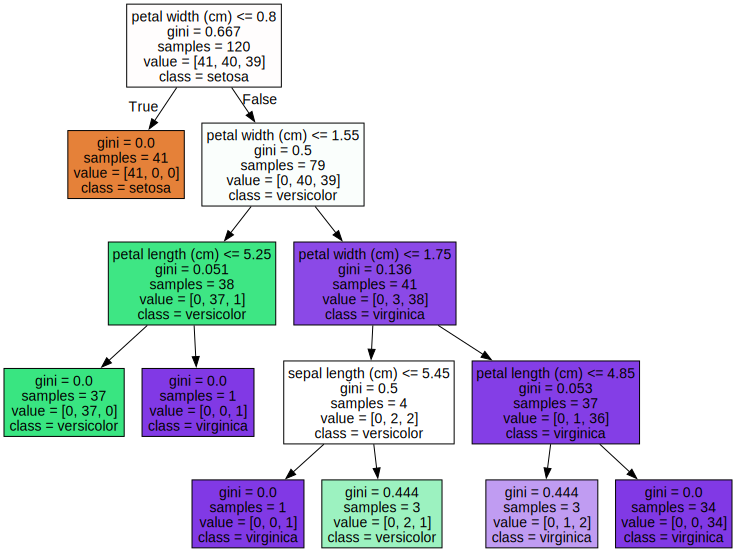

In [44]:
from graphviz import Source
import graphviz
# 'tree.dot' 파일을 읽어서 Source 객체 생성
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

# sample이 4이상 일때만 분리

* min_samples_leaf : 해당 개수의 클래스가 하나라도 존재해야 분기

In [45]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,iris_label,
                                                    test_size=0.2,random_state=11)

dt_clf = DecisionTreeClassifier(min_samples_leaf=3,random_state=11)
dt_clf.fit(X_train,y_train)

pred = dt_clf.predict(X_test)

In [46]:
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris.target_names,
                feature_names =iris.feature_names,impurity=True,filled=True)

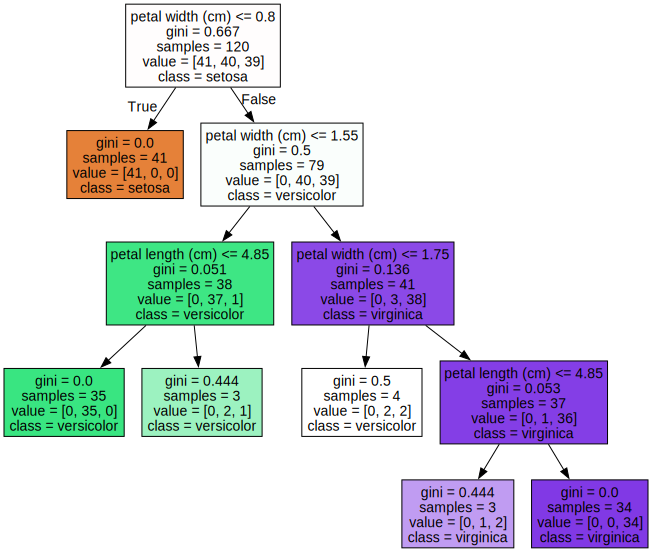

In [47]:
from graphviz import Source
import graphviz
# 'tree.dot' 파일을 읽어서 Source 객체 생성
with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

# 각 클래스가 3 이상일 경우 분기

Feature importances:
[0.    0.    0.016 0.984]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.016
petal width (cm) : 0.984


<Axes: >

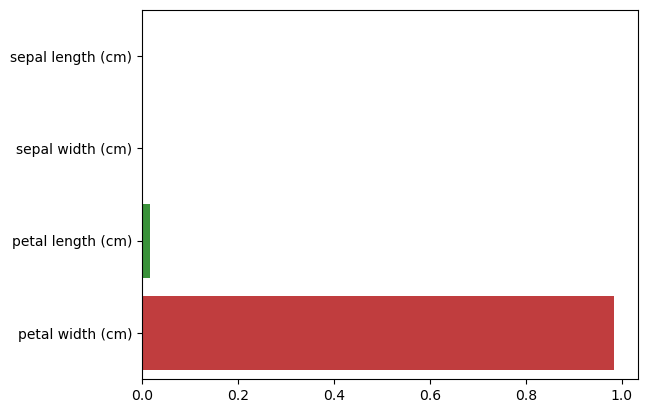

In [50]:
import seaborn as sns
import numpy as np

# feature importance : Decision Tree 모델에서 학습된 특성의 중요도 반환, 각 특성의 중요도를 알 수있음.

print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# 각 특성의 이름과 importance 출력
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

# 중요도는 각 특성이 데이터를 분할하는 데 얼마나 유용한지에 따라 결정
# 불순도가 얼마나 감소시키는지 측정을 하고 불순도 감소가 클수록 해당 특성의 중요도가 높아짐
# 노드의 크기가 클수록 해당 노드의 중요도도 높아짐
# feature_importances_ 는 불순도를 측정하여 어떤게 더 중요한지 알 수있음.

* 결정 트리(Decision Tree) 과적합

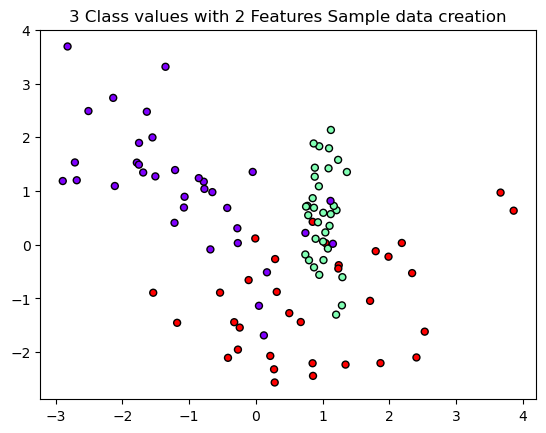

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title('3 Class values with 2 Features Sample data creation')


'''
n_samples : 표본 데이터의 수, 디폴트 100
n_features : 독립 변수의 수, 디폴트 20
n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
(noise같은 경우?)
n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
n_classes : 종속 변수의 클래스 수, 디폴트 2
n_clusters_per_class : 클래스당 클러스터의 수, 디폴트 2
weights : 각 클래스에 할당된 표본 수
random_state : 난수 발생 시드
'''


# make_classification 함수를 사용하여 2개의 특성(feature)과 3가지 클래스(class)를 가지는 분류(Classification)용 샘플 데이터

X_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,
                                           n_classes=3,n_clusters_per_class=1,random_state=0)


plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,cmap='rainbow',edgecolors='k')


In [3]:
import numpy as np


# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
            clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                        levels=np.arange(n_classes + 1) - 0.5,
                        cmap='rainbow', clim=(y.min(), y.max()),
                        zorder=1)

/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_67165/532045030.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


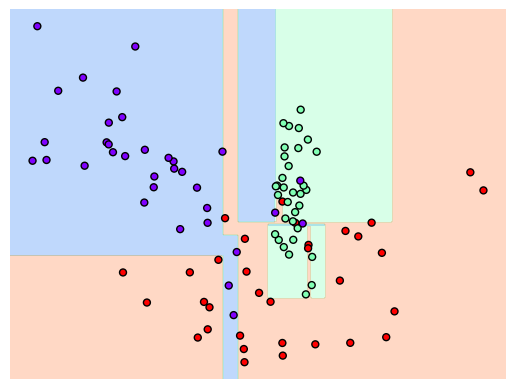

In [4]:
from sklearn.tree import DecisionTreeClassifier


# 제약조건 없음
dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_67165/532045030.py:19: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


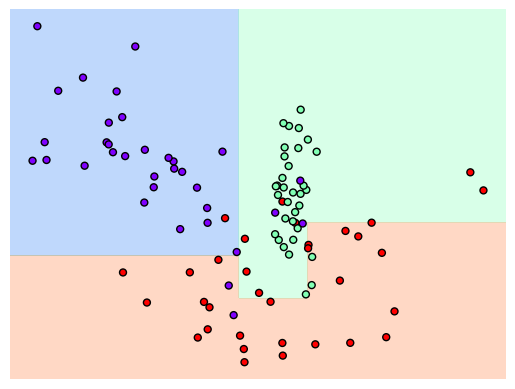

In [5]:
# min_samples_leaf = 6 설정 Decsion Boundary 시각화

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)